In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [11]:
data=pd.read_csv("diabetes.csv")

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
pf=ProfileReport(data)

In [17]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
data["Glucose"].replace(0,data["Glucose"].mean(),inplace=True)
data["BloodPressure"].replace(0,data["BloodPressure"].mean(),inplace=True)
data["SkinThickness"].replace(0,data["SkinThickness"].mean(),inplace=True)
data["Insulin"].replace(0,data["Insulin"].mean(),inplace=True)
data["BMI"].replace(0,data["BMI"].mean(),inplace=True)

In [41]:
sns.set()
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot
ERROR: No matching distribution found for scikitplot


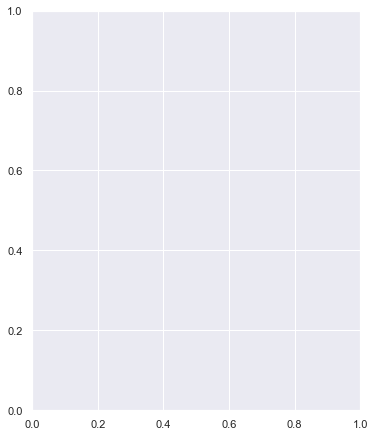

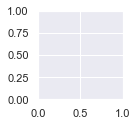

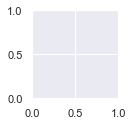

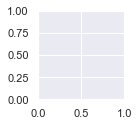

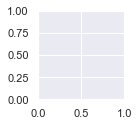

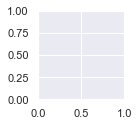

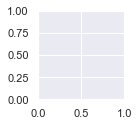

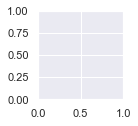

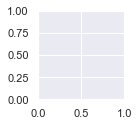

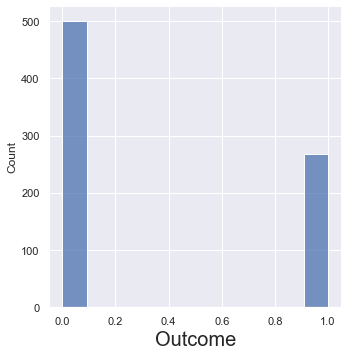

In [42]:
plt.figure(figsize=(20,25),facecolor="white")
plotnum=1
for  column in data:
    if(plotnum<=9):
        ax=plt.subplot(3,3,plotnum)
        sns.displot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnum+=1
plt.show()
    

In [32]:
 for n in data:
        print(n)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


<AxesSubplot:>

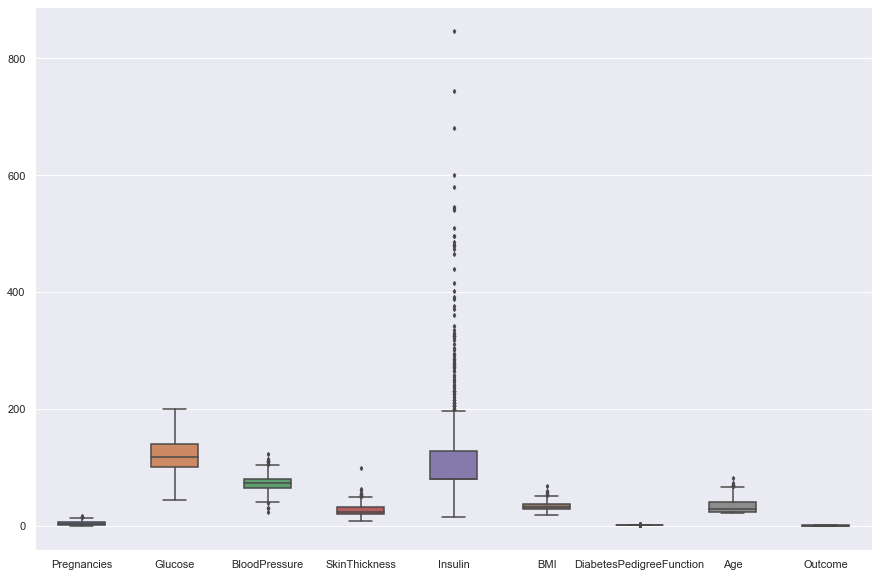

In [55]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax,width=0.5,fliersize=3)

In [62]:
data["Pregnancies"].quantile(0.98)

12.0

In [73]:
q=data["Pregnancies"].quantile(0.98)

In [82]:
cleaned_data=data[data["Pregnancies"]<q]

In [83]:
q=data["BMI"].quantile(0.99)
cleaned_data=cleaned_data[cleaned_data["BMI"]<q]

In [84]:
q=cleaned_data["SkinThickness"].quantile(0.99)
cleaned_data=cleaned_data[cleaned_data["SkinThickness"]<q]

In [85]:
q=cleaned_data["Insulin"].quantile(0.95)
cleaned_data=cleaned_data[cleaned_data["Insulin"]<q]

In [87]:
q=cleaned_data["DiabetesPedigreeFunction"].quantile(0.99)
cleane_data=cleaned_data[cleaned_data["DiabetesPedigreeFunction"]<q]

In [89]:
q=cleaned_data["Age"].quantile(0.99)
cleaned_data=cleaned_data[cleaned_data["Age"]<q]

In [90]:
cleaned_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

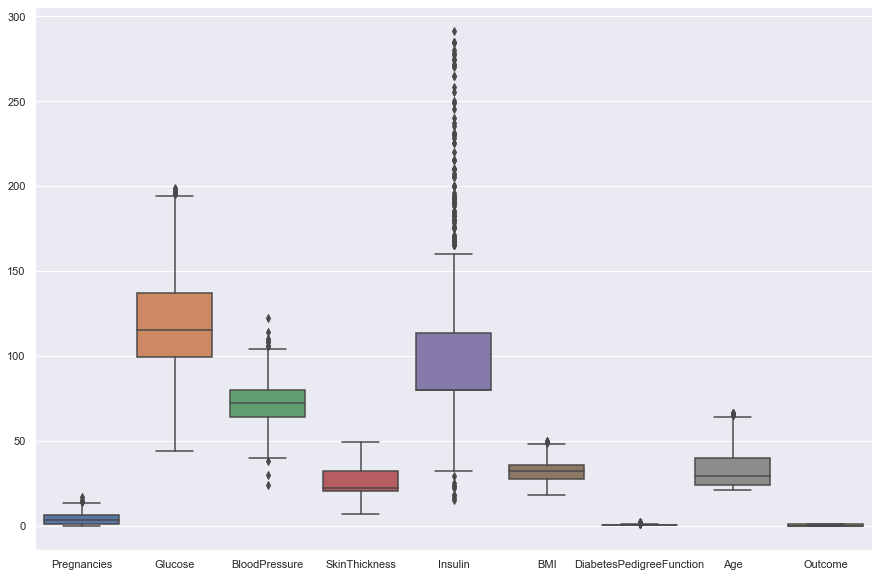

In [94]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=cleaned_data,ax=ax)

In [95]:
X=data.drop(columns=["Outcome"])
y=data.Outcome

In [96]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [97]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [99]:
scaler= StandardScaler()

In [101]:
X_scaled=scaler.fit_transform(X)

In [102]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
vif=pd.DataFrame()

In [106]:
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [109]:
vif["features"]=X.columns

In [110]:
vif

,vif,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [111]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=365)

In [112]:
logistic=LogisticRegression()

In [113]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [114]:
y_pred=logistic.predict(x_test)

In [117]:
accuracy =accuracy_score(y_test,y_pred)

In [118]:
accuracy

0.7760416666666666

In [119]:
conf_mat=confusion_matrix(y_test,y_pred)

In [120]:
conf_mat

array([[113,  21],
       [ 22,  36]], dtype=int64)

In [121]:
conf_mat.shape

(2, 2)

In [122]:
TP=conf_mat[0][0]
TN=conf_mat[1][1]
FP=conf_mat[0][1]
FN=conf_mat[1][0]

In [123]:
ac=(TP+TN)/(TP+TN+FP+FN)

In [125]:
ac

0.7760416666666666

In [126]:
#Sensitivity  or True Positive Rate  or Recall
recall= TP/(TP+FN)

In [127]:
recall

0.837037037037037

In [129]:
#precision 
precision = (TP)/(TP+FP)

In [131]:
precision

0.8432835820895522

In [132]:
#F-1 score
f1=2*(precision*recall)/(precision+recall)
f1

0.8401486988847584

In [133]:
#specificity or True Negative rate
specificity= (TN)/(TN+FP)
specificity

0.631578947368421

In [134]:
#False Postive Rate
fpr=1-specificity

In [135]:
fpr

0.368421052631579

In [136]:
fpr1=FP/(FP+TN)

In [137]:
fpr1


0.3684210526315789

In [139]:
print("accuracy  ",accuracy)
print("Precision  ",precision)
print("recall/TPR/Sensitivity   ",recall)
print("f1score  ",f1)
print("speificty",specificity)
print("FNR/(1-specificty)",fpr)


accuracy   0.7760416666666666
Precision   0.8432835820895522
recall/TPR/Sensitivity    0.837037037037037
f1score   0.8401486988847584
speificty 0.631578947368421
FNR/(1-specificty) 0.368421052631579


In [142]:
auc=roc_auc_score(y_test,y_pred)

In [143]:
auc

0.731986618630983

In [144]:
FPR,TPR,thresholds=roc_curve(y_test,y_pred)

In [145]:
FPR

array([0.        , 0.15671642, 1.        ])

In [146]:
TPR

array([0.        , 0.62068966, 1.        ])

In [147]:
thresholds

array([2, 1, 0], dtype=int64)

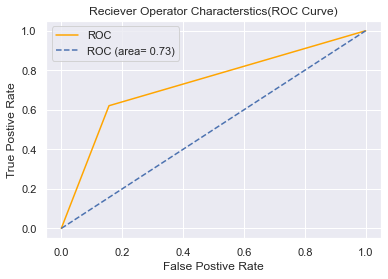

In [167]:
plt.plot(FPR,TPR,color="orange",label="ROC")
plt.plot([0,1],[0,1],linestyle="--",label='ROC (area= %0.2f)'%auc)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("Reciever Operator Characterstics(ROC Curve)")
plt.legend()
plt.show()